Exploration notebook for Kaggle's mastercard default challenge

# Set-up

### Set-up of the data frame and initial exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILE_PATH = 'C:/Users/Nick/Desktop/Nick/Projects/Kaggle/Amex_default_competition/amex-default-prediction/train_data.csv'
df_train = pd.read_csv(FILE_PATH, nrows=100000)
# Upload train dataframe

In [3]:
print(df_train)

                                             customer_ID         S_2  \
0      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09   
1      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07   
2      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28   
3      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13   
4      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16   
...                                                  ...         ...   
99995  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-01-02   
99996  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-02-27   
99997  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-03-08   
99998  049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...  2017-03-29   
99999  049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...  2017-04-28   

            P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0      0.938469  0.001733  0.008724  1.006838  0.009228 

General categories:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables
with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [4]:
FILE_PATH2 = 'C:/Users/Nick/Desktop/Nick/Projects/Kaggle/Amex_default_competition/amex-default-prediction/train_labels.csv'
df_labels = pd.read_csv(FILE_PATH2, nrows=100000)
# Upload train dataframe

In [5]:
print(df_labels)

                                             customer_ID  target
0      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1      00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2      00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3      000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4      00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                  ...     ...
99995  379c691f591070e27fbc48af22b7d1c5a3aaed252513f8...       0
99996  379cd985e084f4a891f2dd8ef293bed05a19171ed0cc13...       0
99997  379ceebf8834f6272f58b71aa7124c1114e768940a7d04...       0
99998  379d1091601a628432bf15d688db67273a2332a787dc61...       0
99999  379d176c2533b3ea64aa0ee4ed20d5f53adf1d2bf80610...       0

[100000 rows x 2 columns]


In [6]:
count = df_labels['customer_ID'].value_counts()
print(count.describe())
# I count the number of times individual labels occur in the df_labels dataset

# customers occur only once in the df_labels (no repetitions)

count    100000.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: customer_ID, dtype: float64


In [7]:
df_tr = pd.merge(df_train, df_labels, on='customer_ID', how='left')
# Join train with its labels

In [8]:
print(df_tr)

                                             customer_ID         S_2  \
0      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09   
1      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07   
2      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28   
3      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13   
4      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16   
...                                                  ...         ...   
99995  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-01-02   
99996  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-02-27   
99997  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-03-08   
99998  049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...  2017-03-29   
99999  049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...  2017-04-28   

            P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0      0.938469  0.001733  0.008724  1.006838  0.009228 

# 1. Data exploration

In [9]:
# 1.1 Number of observations per customer

In [10]:
df_cust = df_tr.groupby('customer_ID').size().reset_index(name='count')
df_cust2 = pd.merge(df_cust, df_labels, on='customer_ID', how='left')
print(df_cust2)

                                            customer_ID  count  target
0     0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...     13       0
1     00000fd6641609c6ece5454664794f0340ad84dddce9a2...     13       0
2     00001b22f846c82c51f6e3958ccd81970162bae8b007e8...     13       0
3     000041bdba6ecadd89a52d11886e8eaaec9325906c9723...     13       0
4     00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...     13       0
...                                                 ...    ...     ...
8289  049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...     13       1
8290  049dc60e06ade9b0bf946472126eed3bb531227f60c7c4...     13       0
8291  049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f...     13       0
8292  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...     13       0
8293  049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...      2       0

[8294 rows x 3 columns]


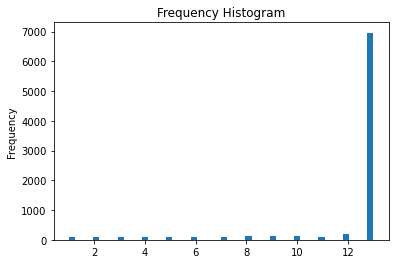

In [11]:
plt.hist(df_cust2[['count']], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
# OK, most customers have 13 observations. A minority of customers have 12 observations or less.

(array([73959.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 26041.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

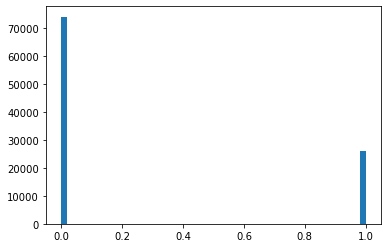

In [12]:
# 1.2 Distribution of target categories
plt.hist(df_labels[['target']], bins=50)
# OK, slight unbalance in the 1 target. Might consider sampling adjustment.

In [25]:
# 1.3 Check NAs by variables

# Several variables present a high percentage of missing
df_nas = df_train.isna().sum() / df_train.count()[0] * 100
# print(df_nas)

df_nas2 = pd.DataFrame (df_nas, columns = ['perc_nas'])

df_nas3 = df_nas2[df_nas2['perc_nas'] > 25]
print(df_nas3)

       perc_nas
D_42     85.386
D_43     30.195
D_49     89.762
D_50     56.328
D_53     73.244
D_56     54.123
S_9      52.734
B_17     56.191
D_66     88.923
D_73     98.851
D_76     88.724
D_77     45.668
R_9      94.207
D_82     72.874
B_29     92.928
D_87     99.927
D_88     99.850
D_105    54.142
D_106    89.870
R_26     89.125
D_108    99.470
D_110    99.366
D_111    99.366
B_39     99.327
S_27     25.379
B_42     98.645
D_132    89.817
D_134    96.384
D_135    96.384
D_136    96.384
D_137    96.384
D_138    96.384
D_142    82.728


In [14]:
# 1.4 Check variables key stats
df_train.describe()

# OK, reported variables appear to be slightly in the same range. Scaling is probably not a big issue here.

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,99214.000000,1.000000e+05,100000.000000,99963.000000,1.000000e+05,81374.000000,9.996300e+04,9.996300e+04,14614.000000,6.980500e+04,...,3616.000000,3616.000000,3616.000000,9.818700e+04,9.927400e+04,9.818700e+04,17272.000000,9.818700e+04,9.926700e+04,9.818700e+04
mean,0.653361,1.549806e-01,0.126169,0.615752,8.096814e-02,0.226610,6.344809e-02,1.339622e-01,0.183178,1.569983e-01,...,0.240878,0.016426,0.174021,1.809009e-01,2.607247e-02,1.666270e-01,0.396094,1.806810e-01,5.550346e-02,6.278066e-02
std,0.246656,2.742308e-01,0.215040,0.401972,2.310420e-01,0.197674,2.086142e-01,2.347874e-01,0.232319,2.250544e-01,...,0.208407,0.105929,0.268368,3.807581e-01,1.436151e-01,3.504973e-01,0.241947,3.805662e-01,1.887721e-01,1.984004e-01
min,-0.383019,8.701630e-07,-0.295126,0.000003,2.970408e-08,-0.254707,6.837608e-08,4.138581e-07,-0.000219,8.705647e-07,...,0.000001,0.000001,0.000008,3.936736e-07,2.982034e-07,5.642931e-08,-0.014441,1.653580e-08,1.161969e-07,4.609489e-08
25%,0.476155,4.565746e-03,0.008944,0.102012,2.886092e-03,0.127014,2.916486e-03,5.334665e-03,0.037692,4.223572e-02,...,0.008802,0.002637,0.003705,3.022039e-03,2.556094e-03,3.030734e-03,0.197756,3.018166e-03,2.755039e-03,3.046179e-03
50%,0.692188,9.124156e-03,0.032475,0.814085,5.787872e-03,0.163829,5.797278e-03,9.938377e-03,0.121966,8.812157e-02,...,0.254010,0.005179,0.007188,6.055295e-03,5.113639e-03,6.061747e-03,0.385266,6.072593e-03,5.507457e-03,6.062823e-03
75%,0.863579,2.368271e-01,0.129060,1.002235,8.670365e-03,0.258561,8.706050e-03,1.612277e-01,0.249639,1.854533e-01,...,0.258483,0.007693,0.502094,9.109797e-03,7.676944e-03,9.096643e-03,0.568553,9.089420e-03,8.277032e-03,9.095337e-03
max,1.009998,5.331360e+00,1.324053,1.010000,2.507711e+00,2.918675,5.465303e+00,1.401687e+00,3.252056,9.089694e+00,...,1.505785,1.009913,1.507705,1.010000e+00,1.009994e+00,1.174753e+00,1.751388,1.010000e+00,1.343284e+00,4.282032e+00


In [23]:
# 1.4 Variables distribution by target 
df_target = df_tr.groupby(['target']).mean()
pd.set_option('display.max_rows', None)
print(df_target.loc[:, df_target.columns.str.startswith("D_")])
print(df_target.loc[:, df_target.columns.str.startswith("S_")])
print(df_target.loc[:, df_target.columns.str.startswith("P_")])
print(df_target.loc[:, df_target.columns.str.startswith("R_")])

# OK, there seems to be some discrimination across all variables type. No clear cut.

# D_* = Delinquency variables S_* = Spend variables P_* = Payment variables B_* = Balance variables R_* = Risk variables 

            D_39      D_41      D_42      D_43      D_44      D_45      D_46  \
target                                                                         
0       0.124313  0.030853  0.114452  0.115592  0.060647  0.289256  0.455945   
1       0.245113  0.159258  0.249775  0.257673  0.298740  0.142155  0.520061   

            D_47      D_48      D_49  ...     D_136     D_137     D_138  \
target                                ...                                 
0       0.448487  0.276510  0.192938  ...  0.225856  0.010720  0.167289   
1       0.290059  0.680922  0.176489  ...  0.250501  0.020083  0.178335   

           D_139     D_140     D_141     D_142     D_143     D_144     D_145  
target                                                                        
0       0.151401  0.015803  0.140202  0.407246  0.151182  0.056728  0.048210  
1       0.268512  0.056454  0.245106  0.377690  0.268288  0.051882  0.106054  

[2 rows x 94 columns]
             S_3       S_5       S_6   

In [16]:
# 1.5 Variables Correlation 
corr = df_tr.corr()
  
# Displaying dataframe as an heatmap 
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

# Have some highly correlated variables. Hard to select which one to remove without metadata. Might consider a feature selection algorithm.

# TO DO: - remove highly correlated variables within the same variable class.

C:\Users\Nick\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Nick\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


# 2. Feature engineering and selection

In [26]:
# Features to create

# 1. Non-frequent customer -> 1 if customer appears less than 13 times


# 2. Dummies for high NA variables encoding (as stored in df_nas3): 0 if NA, 1 otherwise?

df_tr['D_42_NA'] = np.where(df_tr['D_42'].isna(), 1, 0)
df_tr['D_43_NA'] = np.where(df_tr['D_43'].isna(), 1, 0)
df_tr['D_49_NA'] = np.where(df_tr['D_49'].isna(), 1, 0)
df_tr['D_50_NA'] = np.where(df_tr['D_50'].isna(), 1, 0)
df_tr['D_53_NA'] = np.where(df_tr['D_53'].isna(), 1, 0)
df_tr['D_56_NA'] = np.where(df_tr['D_56'].isna(), 1, 0)
df_tr['S_9_NA'] = np.where(df_tr['S_9'].isna(), 1, 0)
df_tr['B_17_NA'] = np.where(df_tr['B_17'].isna(), 1, 0)
df_tr['D_66_NA'] = np.where(df_tr['D_66'].isna(), 1, 0)
df_tr['D_73_NA'] = np.where(df_tr['D_73'].isna(), 1, 0)
df_tr['D_76_NA'] = np.where(df_tr['D_76'].isna(), 1, 0)
df_tr['D_77_NA'] = np.where(df_tr['D_77'].isna(), 1, 0)
df_tr['R_9_NA'] = np.where(df_tr['R_9'].isna(), 1, 0)
df_tr['D_82_NA'] = np.where(df_tr['D_82'].isna(), 1, 0)
df_tr['B_29_NA'] = np.where(df_tr['B_29'].isna(), 1, 0)
df_tr['D_87_NA'] = np.where(df_tr['D_87'].isna(), 1, 0)
df_tr['D_88_NA'] = np.where(df_tr['D_88'].isna(), 1, 0)
df_tr['D_105_NA'] = np.where(df_tr['D_105'].isna(), 1, 0)
df_tr['D_106_NA'] = np.where(df_tr['D_106'].isna(), 1, 0)
df_tr['R_26_NA'] = np.where(df_tr['R_26'].isna(), 1, 0)
df_tr['D_108_NA'] = np.where(df_tr['D_108'].isna(), 1, 0)
df_tr['D_110_NA'] = np.where(df_tr['D_110'].isna(), 1, 0)
df_tr['D_111_NA'] = np.where(df_tr['D_111'].isna(), 1, 0)
df_tr['B_39_NA'] = np.where(df_tr['B_39'].isna(), 1, 0)
df_tr['S_27_NA'] = np.where(df_tr['S_27'].isna(), 1, 0)
df_tr['D_132_NA'] = np.where(df_tr['D_132'].isna(), 1, 0)
df_tr['D_134_NA'] = np.where(df_tr['D_134'].isna(), 1, 0)
df_tr['D_135_NA'] = np.where(df_tr['D_135'].isna(), 1, 0)
df_tr['D_136_NA'] = np.where(df_tr['D_136'].isna(), 1, 0)
df_tr['D_137_NA'] = np.where(df_tr['D_137'].isna(), 1, 0)
df_tr['D_138_NA'] = np.where(df_tr['D_138'].isna(), 1, 0)
df_tr['D_142_NA'] = np.where(df_tr['D_142'].isna(), 1, 0)

# 2. Period variables (year-month)
# 3. Range in dates across observations for single customers?


In [18]:
df_cust2['infrequent_customer'] = (df_cust2['count'] < 13).astype(int)
# I create a dummy indicating whether the customer appeared more than once or not

# TO BE PUT IN JOIN WITH df_train


In [19]:
# Consider sampling adjustment in the training

# Modeling 

- Logit model (as a reference)
- SVM
- Random forest (comparison)
- Ensemble models

Models comparison:
- accuracy
- sensitivity / recall
Discuss the ideal target with Fanelli - Subsampling?